## Importing required functions from python libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist
import random
import copy


random.seed(0)
np.random.seed(0)

EUCLIDEAN_DISTANCE = 'euclidean'
SQEUCLIDEAN_DISTANCE = 'sqeuclidean'

## Importing the dataset and create a new data set with two features (x1, x2).

In [2]:
# Importing the dataset.
dataset = pd.read_csv('iris.data', names=['SepalLength', 'SepalWidth', 'PetalLength', 'PetalWidth', 'Additional'])

"""
new data set with two features by computing the ratio of raw features x = (x1, x2) 
where x1 = (sepal length/sepal width) and x2 = (petal length/petal width)) 
"""
x1 = dataset["SepalLength"]/dataset["SepalWidth"]
x2 = dataset["PetalLength"]/dataset["PetalWidth"]

number_of_features = len(x1)
features = np.array(x1).reshape(number_of_features, 1)
features = np.append(features, np.array(x2).reshape(number_of_features, 1), axis=1)

## Normalizing the dataset.

In [3]:
normalized_features = np.array((np.array(x1)-np.array(x1).mean())/np.array(x1).std()).reshape(number_of_features, 1)
normalized_features = np.append(normalized_features, ((np.array(x2)-np.array(x2).mean())/np.array(x2).std()).reshape(number_of_features, 1), axis=1)

## ******NOTE: Normalized data set will be used for this problem.

## Plotting the data to observe the clusters in data.

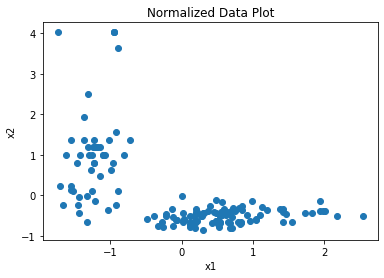

In [4]:
plt.scatter(normalized_features[:,0],normalized_features[:,1])
plt.title("Normalized Data Plot")
plt.xlabel('x1')
plt.ylabel('x2')
plt.show()

## Function to get the distance matrix

In [5]:
def get_distance_matrix(features, centroid, distance_calculator=EUCLIDEAN_DISTANCE):
    """
    
    Parameters
    ----------
    features : {array-like, sparse matrix} of shape (n_sample, n_features)
    centroid : {array-like, sparse matrix} of shape (1, n_features)
           
    Returns
    -------
    distance_matrix : {array-like, sparse matrix}
                      The distance of the features from the given centroid.
    
    """
    return np.array(cdist(features, centroid, distance_calculator))
    

## Function to get the accuracy matrix

In [6]:
def get_accuracy_matrix(features, centroid, k, num_iters):
    """
    
    Parameters
    ----------
    features : {array-like, sparse matrix} of shape (n_sample, n_features)
    centroid : {array-like, sparse matrix} of shape (1, n_features)
    k        : {int} the number `k` of the k-nearest neighbours
    num_iters: {int} number of iterations.
           
    Returns
    -------
    clusters : {list}
               The points within the cluster.
    centers  : {list}
               The center of all the points with the clusters list.
    accuracy : {list} 
               The accuracy of the cluster from each point.
    
    """
    accuracy = []

    for each_iteration in range(0, num_iters): 
        distances = get_distance_matrix(features, centroid)
        clusters = np.array([np.argmin(val) for val in distances])
        centers = []
        for each_cluster in range(0,k):
            mean = features[clusters==each_cluster].mean(axis=0) 
            centers.append(mean)  
        centers = np.vstack(centers)
         
        accuracy_matrix = get_distance_matrix(features, centers, distance_calculator=SQEUCLIDEAN_DISTANCE)
        total = 0
        for i in range(0 , len(accuracy_matrix)):
            total += accuracy_matrix[i, clusters[i]]
            
        accuracy.append(total)
    
    return clusters, centers, accuracy

## Execute the kMeans++ Algorithm

In [7]:
def run_kmeans_plus_plus(input_features, k, num_iters):
    """
    
    Parameters
    ----------
    input_features  : {array-like, sparse matrix} of shape (n_sample, n_features)
                      The feature matrix.
    k               : {int} the number `k` of the k-nearest neighbours
    num_iters       : {int} the number of iterations to run
    
           
    Returns
    -------
    get_accuracy_matrix() : function call to get_accuracy_matrix which returns
                            the clusters, their respective centers and the accuracy.
    
    """
    features = copy.deepcopy(input_features)
    randomIndex = np.random.choice(len(features), 1, replace=False)
    centers = features[randomIndex, :]
    features = np.delete(features,randomIndex, axis=0)
    centroid = centers
    for i in range(1 , k):
        distances = get_distance_matrix(features, centroid)
        centers = np.append(centers, np.array(features[np.argmax(distances), :]).reshape(1,2), axis=0)
        features = np.delete(features, np.argmax(distances), axis=0)    
        centroid = [[centers[:,0].mean(), centers[:,1].mean()]]
        
    return get_accuracy_matrix(input_features, centers, k, num_iters)

## Plots the Clusters VS Clustering Objective Plot

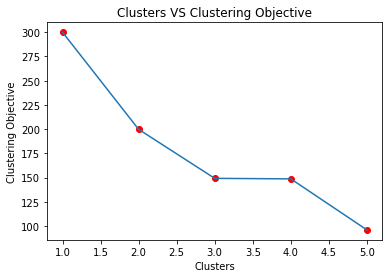

In [8]:
all_clusters = []
all_centers = [] 
total_accuracy = []
for i in range(1,6):
    clusters,centers,accuracy = run_kmeans_plus_plus(normalized_features, i, 50)
    all_clusters.append(clusters)
    all_centers.append(centers)
    total_accuracy.append(accuracy)

# Clusters VS Clustering Objective Plot
plt.scatter(range(1,6), [total_accuracy[0][-1],total_accuracy[1][-1],total_accuracy[2][-1],total_accuracy[3][-1],total_accuracy[4][-1]], color="r")
plt.plot(range(1,6), [total_accuracy[0][-1],total_accuracy[1][-1],total_accuracy[2][-1],total_accuracy[3][-1],total_accuracy[4][-1]])
plt.title("Clusters VS Clustering Objective")
plt.xlabel('Clusters')
plt.ylabel('Clustering Objective')
plt.show()

## Plot the cluster centers.

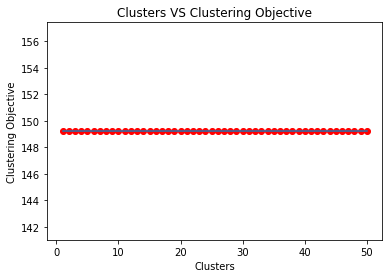

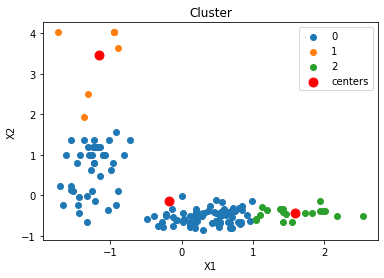

In [9]:
plt.scatter(range(1,51), total_accuracy[2], color="r")
plt.plot(range(1,51), total_accuracy[2])
plt.title("Clusters VS Clustering Objective")
plt.xlabel('Clusters')
plt.ylabel('Clustering Objective')
plt.show() 


label = all_clusters[2]
centers = all_centers[2]
cluster = np.unique(label)
for i in cluster:
    plt.scatter(normalized_features[label == i , 0] , normalized_features[label == i , 1] , label = i)
plt.scatter(centers[:, 0], centers[:, 1], c='r',label = "centers", s=80)
plt.title("Cluster")
plt.xlabel('X1')
plt.ylabel('X2')
plt.legend()
plt.show()

In [10]:
%load_ext watermark

%watermark -v -m -p pandas,numpy,matplotlib,scipy,watermark

print(" ")
%watermark -u -n -t -z

The watermark extension is already loaded. To reload it, use:
  %reload_ext watermark
Python implementation: CPython
Python version       : 3.9.13
IPython version      : 8.5.0

pandas    : 1.5.1
numpy     : 1.23.3
matplotlib: 3.6.0
scipy     : 1.9.3
watermark : 2.3.1

Compiler    : Clang 13.1.6 (clang-1316.0.21.2.5)
OS          : Darwin
Release     : 21.6.0
Machine     : arm64
Processor   : arm
CPU cores   : 8
Architecture: 64bit

 
Last updated: Tue Oct 25 2022 23:44:23EDT

